# Dealing with Outliers

In this notebook we will first re-visit the outliers analysis that we did in the EDA chapter, before taking action for any outliers where necessary.

### Import Basic Packages

In [14]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Scenario & Data

We'll be looking a the dataset from the school grades once again. In the end we are trying to predict their GPA, based on various input features. Our task in this notebook is to deal with the outliers in each feature that we discovered in the EDA chapter.

We'll explore several different approaches to dealing with outliers.

- removing outliers entirely
- scale down outliers to a maximum plausible value
- keeping outliers as is and using our knowledge about them to inform our modelling choices.

In [15]:
df_grades = pd.read_csv('student grades FE.csv')
df_grades

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8
5,20123461,Amy,Winehouse,B,Arts,36537,10,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8
7,20123463,Homer,Simpson,C,Engineering,47669,4,7
8,20123464,Marge,Simpson,B,Math,39429,10,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7


### Recap of EDA Outliers Identification

Recall in the EDA chapter we covered how we can use box plots to visually present the outliers in our data. We can see that using the same code we learned in the previous notebook, we can see some outlier points for column `OH_participated`.

In [16]:
#Identify numeric columns
outlier_cols = ['tuition', 'OH_participated','classes_skipped']
outlier_cols

['tuition', 'OH_participated', 'classes_skipped']

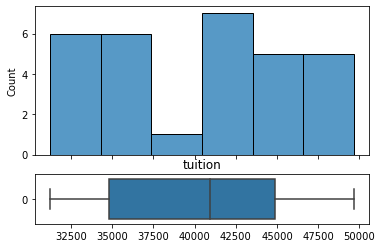

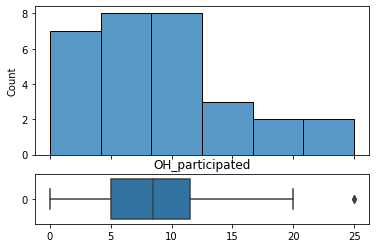

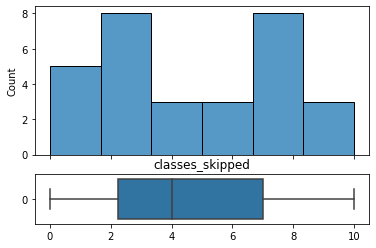

In [17]:
#Use box plots and histogram plots to confirm the distribution and presence of outliers.
for feature in outlier_cols:
    fig, (hist, box) = plt.subplots(2, 1,sharex=True,gridspec_kw={'height_ratios': [3, 1]})
    plt.title(feature)
    sns.histplot(df_grades[feature],ax=hist)
    sns.boxplot(data=df_grades[feature],orient='h',ax=box)

### Dealing with Outliers

#### Leaving the Outlier data as is

Often, simply knowing the outliers exists is helpful and we may not make any changes to the data. This information helps us understand the likely impacts on:
- Scaling
- Model Choices
- Evaluation Metrics

One thing to keep in mind when leaving an outlier in the dataset is that since it is now treated as a regular data point, steps such as using scalers that are prone to outlier values may have their performance affected. One thing we can do as best practice when keeping outlier values is to see if it is justfied keeping it by comparing model performance between data with the outlier and without.

Our preferred choice should be to keep the outliers if possible, and find a model that works well with them.

#### Removing the Outlier

Removing outliers should not be our first choice, and should only be done as a last resort to improve model performance if we cannot find a method to model the full dataset well. Ideally, we want a model that works well for all of our data.

In [42]:
# Remove rows based on a condition
q1 = np.percentile(df_grades['OH_participated'], 25)
q3 = np.percentile(df_grades['OH_participated'], 75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

df_grades_removeout = df_grades[df_grades['OH_participated'] <= upper_limit]
df_grades_removeout

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8
5,20123461,Amy,Winehouse,B,Arts,36537,10,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8
7,20123463,Homer,Simpson,C,Engineering,47669,4,7
8,20123464,Marge,Simpson,B,Math,39429,10,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7


#### Modifying the Outlier Value (Winsorizing)

There is a third option - modifying outliers.

After speaking with the school database administrator, we learn that the school system allowed students to sign up for more than 20 hours, when in actuality the student is capped at 20 hours. In this case, we can modify any values greater than 20 down to a threshold of 20.

In [30]:
# modify values down to 20
df_grades_modify.loc[df_grades['OH_participated'] > 20, 'OH_participated'] = 20

In [26]:
#Inspect the result
df_grades_modify

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8
5,20123461,Amy,Winehouse,B,Arts,36537,10,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8
7,20123463,Homer,Simpson,C,Engineering,47669,4,7
8,20123464,Marge,Simpson,B,Math,39429,10,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7


### Exercise 1 (Basic) - Visualizing outliers 

In [ ]:
# Run this code to import the dataset for the exercise
df_basketball = pd.read_csv('basketball_stats.csv')
df_basketball

In [ ]:
# Plot a box plot for the rebounds per game column


### Exercise 2 - Dealing with outliers

Consider the options for what to do with this outlier. Should it be removed? Modified? Or left as is.